<a href="https://colab.research.google.com/github/rezkyputra16/latihan/blob/main/056_Rezky_Putra_Post_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

In [ ]:
from itertools import combinations
import pandas as pd

# membaca dataset
with open('dataset_market_basket.txt', 'r') as f:
    lines = f.readlines()

# mengubah dataset menjadi format daftar transaksi
transactions = []
for line in lines:
    items = line.strip().split(',')
    transactions.append([item.strip() for item in items])
# membuat tabel tabulasi
items = set([item for transaction in transactions for item in transaction])
table = pd.DataFrame(0, columns=items, index=range(len(transactions)))
for i, transaction in enumerate(transactions):
    for item in transaction:
        table[item][i] = 1

table


,hygiene articles,sausage,salty snack,detergent,root vegetables,cling film/bags,rolls/buns,frozen meals,canned beer,specialty chocolate,...,tropical fruit,semi-finished bread,soda,curd,dish cleaner,dental care,butter,beef,misc. beverages,white bread
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# menghitung support untuk setiap 2-itemset
total_transactions = len(transactions)
support_dict = {}
for col1, col2 in combinations(table.columns, 2):
    if col1 != col2:
        pair = tuple(sorted([col1, col2]))
        support = table[(table[col1] == 1) & (table[col2] == 1)].shape[0] / total_transactions
        support_dict[pair] = support

# menghitung confidence untuk setiap 2-itemset
confidence_dict = {}
for pair, support in support_dict.items():
    item1, item2 = pair
    item1_support = table[table[item1] == 1].shape[0] / total_transactions
    confidence = support / item1_support
    confidence_dict[pair] = confidence

# menampilkan daftar support dan confidence untuk 2-itemset
for pair, support in support_dict.items():
    item1, item2 = pair
    confidence = confidence_dict[pair]
    print(f'{item1} dan {item2}:')
    print(f'- Support: {support:.2f}')
    print(f'- Confidence: {confidence:.2f}\n')

hygiene articles dan sausage:
- Support: 0.05
- Confidence: 1.00

hygiene articles dan salty snack:
- Support: 0.00
- Confidence: 0.00

detergent dan hygiene articles:
- Support: 0.00
- Confidence: 0.00

hygiene articles dan root vegetables:
- Support: 0.00
- Confidence: 0.00

cling film/bags dan hygiene articles:
- Support: 0.00
- Confidence: 0.00

hygiene articles dan rolls/buns:
- Support: 0.00
- Confidence: 0.00

frozen meals dan hygiene articles:
- Support: 0.00
- Confidence: 0.00

canned beer dan hygiene articles:
- Support: 0.00
- Confidence: 0.00

hygiene articles dan specialty chocolate:
- Support: 0.00
- Confidence: 0.00

frankfurter dan hygiene articles:
- Support: 0.00
- Confidence: 0.00

hygiene articles dan sugar:
- Support: 0.00
- Confidence: 0.00

hygiene articles dan whole milk:
- Support: 0.00
- Confidence: 0.00

hygiene articles dan whipped/sour cream:
- Support: 0.00
- Confidence: 0.00

frozen vegetables dan hygiene articles:
- Support: 0.00
- Confidence: 0.00

butt

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

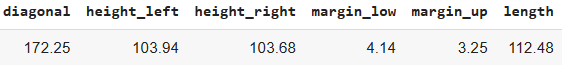
<!-- 1412 -->

In [ ]:
import math

data = {
    'is_genuine': ['TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE'],
    'diagonal': [172.06, 171.66, 172.23, 172.07, 171.79, 172.0, 171.56, 171.9, 171.84, 172.11],
    'height_left': [104.24, 103.68, 104.0, 104.21, 104.57, 104.23, 104.03, 104.33, 104.06, 104.14],
    'height_right': [103.66, 103.41, 103.35, 103.82, 104.04, 104.52, 103.93, 104.4, 104.1, 104.15],
    'margin_low': [4.24, 4.35, 4.43, 4.29, 4.26, 5.76, 5.47, 4.7, 4.87, 4.84],
    'margin_up': [3.1, 3.33, 2.95, 3.35, 3.15, 3.37, 3.5, 3.31, 3.25, 3.28],
    'length': [113.02, 113.74, 113.12, 113.3, 113.46, 110.94, 111.67, 112.12, 111.04, 110.98]
}

target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# Membuat list untuk menampung jarak antara setiap data dengan target
jarak = []
for i in range(len(data['is_genuine'])):
    diagonal = data['diagonal'][i] - target[0]
    height_left = data['height_left'][i] - target[1]
    height_right = data['height_right'][i] - target[2]
    margin_low = data['margin_low'][i] - target[3]
    margin_up = data['margin_up'][i] - target[4]
    length = data['length'][i] - target[5]
    jarak.append(math.sqrt(diagonal**2 + height_left**2 + height_right**2 + margin_low**2 + margin_up**2 + length**2))

print(jarak)


[0.6712674578735285, 1.4583209523283898, 0.8346256645946192, 0.9109335870413307, 1.3125928538583398, 2.42128065287773, 1.741895519254815, 1.113463066293622, 1.722033681435988, 1.7382174777627788]


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [ ]:
# Menghitung K berdasarkan akar dua dari banyak data
K = round(math.sqrt(len(jarak)))

# Membuat DataFrame dari data dan jarak
df = pd.DataFrame(data)
df['jarak'] = jarak

# Mengurutkan DataFrame berdasarkan jarak terdekat dan mengambil K teratas
df_sorted = df.sort_values('jarak').head(K)

# Menampilkan hasil
print(df_sorted)


  is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0       TRUE    172.06       104.24        103.66        4.24       3.10   
2       TRUE    172.23       104.00        103.35        4.43       2.95   
3       TRUE    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [ ]:
k = round(math.sqrt(len(data['is_genuine'])))
# Membuat list dari indeks data terdekat dengan target
indeks_terdekat = sorted(range(len(jarak)), key=lambda k: jarak[k])[:k]

# Mengambil label dari data yang terdekat
label_terdekat = [data['is_genuine'][i] for i in indeks_terdekat]

# Menghitung label terbanyak
label_prediksi = max(set(label_terdekat), key=label_terdekat.count)

# Menampilkan hasil prediksi
print("Hasil prediksi: ", label_prediksi)

Hasil prediksi:  TRUE


# (3) Analisis

> Nama : Rezky Putra Kurniawan 

> Nim : 2109116056


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

***Business Understanding***

**Penjelasan**

Dataset Superstore adalah kumpulan data dari suatu perusahaan yang menjual berbagai macam produk melalui toko-toko offline maupun toko online. Dataset ini terdiri dari 13 variabel.

**Tujuan**

Dataset Superstore memiliki tujuan untuk membantu perusahaan dalam melakukan analisis penjualan produk pada setiap kategori. Dengan data ini, perusahaan dapat mengetahui produk mana yang laris di pasaran dan memperoleh keuntungan yang tinggi, serta mengetahui kategori produk yang perlu diperbaiki penjualannya agar dapat meningkatkan keuntungan perusahaan.

1. Ship Mode : tingkat pelayanan pengantaran kapal mulai dari First Class, Second Class dan Standar Class.
2. Segment : Sekumpulan pengguna pelanggan yang dibedakan menjadi Consumer, Home Office dan Corporate.
3. Country : Negara tempat produk dikirim, pada dataset ini hanya terdapat United States.
4. City : Kota tempat produk dikirim, pada dataset ini hanya kota yang berada di United States.
5. State : Negara bagian 
6. Postal Code : kode pos di untuk memudahkan pengiriman produk
7. Region : wilayah produk dikirim
8. Category : jenis ketegori barang furniture, office supplies dan technology
9. Sub-category : jenis kategori barang yang lebih spesifik
10. Sales : total penjualan dari setiap produk
11. Quantity : jumlah produk yang dibeli
12. Discount : potongan harga yang diberikan pada setiap produk 
13. Profit : keuntungan dari setiap produk


In [ ]:
dfkat = pd.read_csv('SampleSuperstore.csv')
dfkat

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


***Data Understanding***

In [ ]:
import numpy as np

In [ ]:
dfkat.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
dfkat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
dfkat.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
dfkat.columns = dfkat.columns.str.replace(' ', '_')
dfkat.columns = dfkat.columns.str.replace('-', '_')

In [ ]:
dfkat

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


***Explore Data***

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

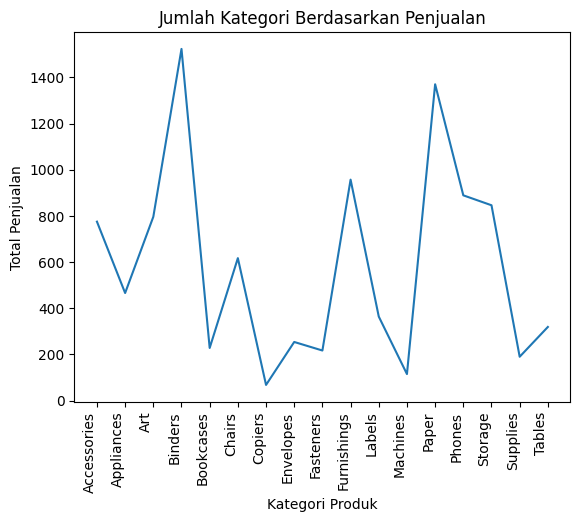

In [ ]:
#Visualisasi Comparison
kategori = dfkat['Sub_Category']

produk = kategori.value_counts()

produk = produk.sort_index()

plt.plot(produk.index, produk.values)

plt.title('Jumlah Kategori Berdasarkan Penjualan')

plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90, ha='right')

# tampilkan plot
plt.show()

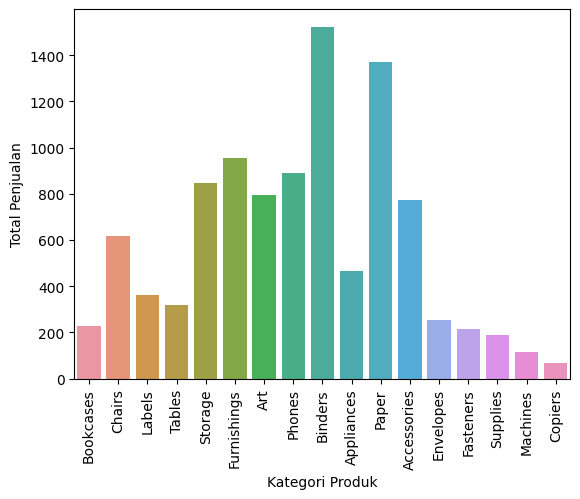

In [ ]:
kategori = sns.countplot(x='Sub_Category', data=dfkat)

kategori.set_xlabel("Kategori Produk")
kategori.set_ylabel("Total Penjualan")

plt.xticks(rotation=90)

plt.show()


Visualisasi tersebut menunjukkan bahwa kategori produk dengan jumlah penjualan terbanyak adalah kategori "Binders", diikuti oleh kategori "Paper" dan "Furnishings". Sementara itu, subkategori produk dengan jumlah penjualan terendah adalah kategori "Copiers".

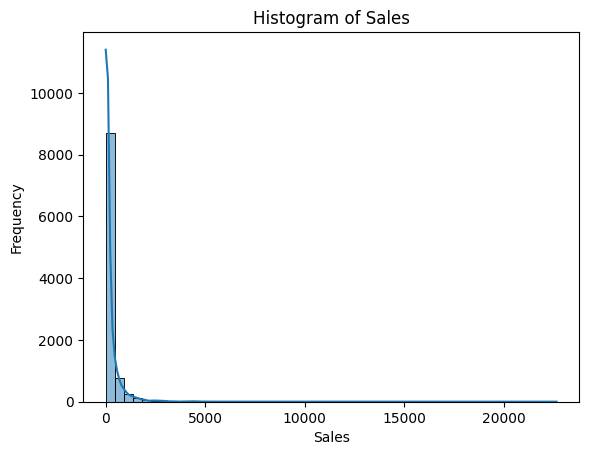

In [ ]:
import seaborn as sns

sns.histplot(data=dfkat, x="Sales", kde=True,bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()


Histogram tersebut menunjukkan bahwa sebagian besar nilai dari variabel "Sales" pada dataset Superstore cenderung berada pada rentang nilai yang lebih rendah. Puncak histogram terletak pada rentang nilai sekitar 0 hingga 2.500, yang menunjukkan bahwa sebagian besar penjualan produk pada perusahaan retail tersebut bernilai rendah.

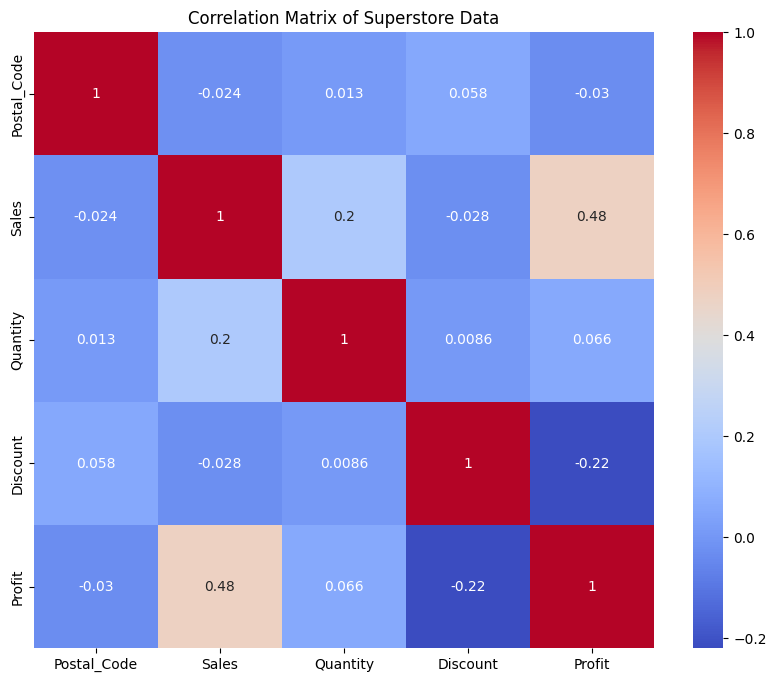

In [ ]:
import seaborn as sns

# create correlation matrix
corr_matrix = dfkat.corr()

# create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Superstore Data')
plt.show()

1. Korelasi positif yang kuat terdapat antara variabel "Sales" dan "Profit". Hal ini menunjukkan bahwa semakin tinggi nilai dari variabel "Sales", maka semakin tinggi pula nilai dari variabel "Profit".

2. Terdapat korelasi positif yang moderat antara variabel "Sales" dan "Quantity", yang menunjukkan bahwa semakin tinggi nilai dari variabel "Sales", maka cenderung semakin tinggi pula nilai dari variabel "Quantity".

3. Terdapat juga korelasi positif yang moderat antara variabel "Profit" dan "Quantity", yang menunjukkan bahwa semakin tinggi nilai dari variabel "Profit", maka cenderung semakin tinggi pula nilai dari variabel "Quantity".

4. Tidak terdapat korelasi yang kuat antara variabel "Sales" dan "Discount", serta antara variabel "Profit" dan "Discount".

***Data Preparation***

**Missing Value**

In [ ]:
dfkat.isnull().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
dfkat.dropna(inplace=True)
if dfkat.isnull().any().any():
    print("Terdapat nilai null pada dataset")
else:
    print("Semua data terisi")

Semua data terisi


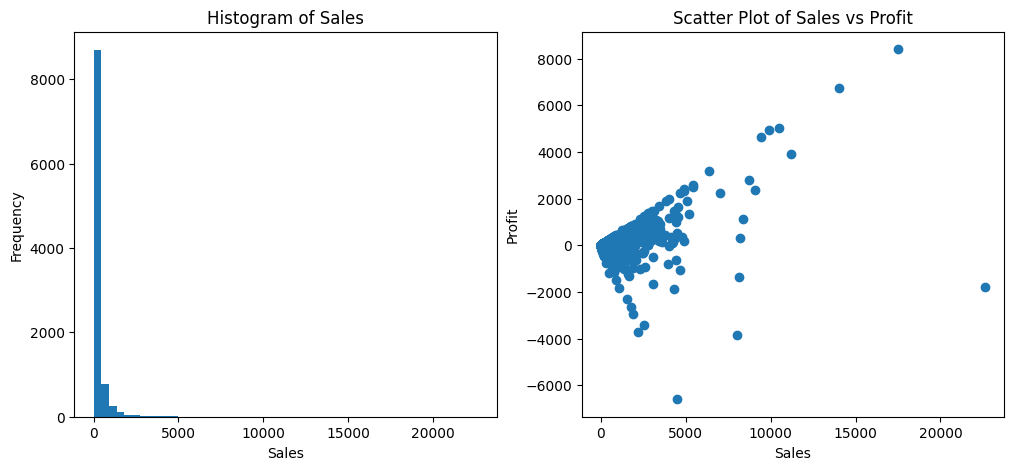

In [ ]:
# create figure and subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# create histogram on the first subplot
ax1.hist(dfkat['Sales'], bins=50)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Sales')

# create scatter plot on the second subplot
ax2.scatter(dfkat['Sales'], dfkat['Profit'])
ax2.set_xlabel('Sales')
ax2.set_ylabel('Profit')
ax2.set_title('Scatter Plot of Sales vs Profit')

# display the plot
plt.show()


In [ ]:

# calculate quantiles
q1 = dfkat['Sales'].quantile(0.25)
q2 = dfkat['Sales'].quantile(0.5)
q3 = dfkat['Sales'].quantile(0.75)

# print quantiles
print('Q1:', q1)
print('Q2:', q2)
print('Q3:', q3)

IQR (Interquartile Range) adalah jarak antara kuartil atas (q3) dan kuartil bawah (q1) pada sebuah distribusi data. IQR digunakan untuk mengukur seberapa jauh data tersebar di antara kuartil pada dataset. Untuk menghitung nilai IQR pada dataset, kita dapat menggunakan rumus berikut:


In [ ]:
iqr = q3 - q1
print('Interquartile Range', iqr)

Interquartile Range 192.66


In [ ]:
low_bound = q1 - 1.5*iqr
up_bound = q3 + 1.5*iqr

In [ ]:
outlier = dfkat[(dfkat['Sales'] < low_bound) | (dfkat['Sales'] > up_bound)]
outlier

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
11,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9942,Standard Class,Consumer,United States,Anaheim,California,92804,West,Office Supplies,Storage,998.8200,9,0.00,29.9646
9947,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Furniture,Chairs,1925.8800,6,0.00,539.2464
9948,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Office Supplies,Appliances,2405.2000,8,0.00,793.7160


In [ ]:
no_outlier = dfkat[~(dfkat['Sales'] < low_bound) | (dfkat['Sales'] > up_bound)]
no_outlier

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200
